## Credit Card Fraud Detection

In this project we will predict Global warming with the help of Machine learning models.We will import the following libraries to get started.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("dark")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [108]:
data = pd.read_csv("GlobalLandTemperaturesByCity.csv")
data.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


In [109]:
#observe the different feature type present in the data
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [110]:
print("Total rows in the dataset:",data.count()["dt"])
print("Maximum recorded temperature:",data.max()["AverageTemperature"])
print("Minimum recorded temperature:",data.min()["AverageTemperature"])

Total rows in the dataset: 8599212
Maximum recorded temperature: 39.651
Minimum recorded temperature: -42.70399999999999


We are interested only in the data pertaining to **Zwolle** city. So, let us extract that from the dataset, and print the first five rows.

In [111]:
city_data = data[data["City"]=="Lagos"]
city_data.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4102595,1849-01-01,26.343,1.555,Lagos,Nigeria,5.63N,3.23E
4102596,1849-02-01,26.415,1.515,Lagos,Nigeria,5.63N,3.23E
4102597,1849-03-01,27.269,1.635,Lagos,Nigeria,5.63N,3.23E
4102598,1849-04-01,25.942,1.473,Lagos,Nigeria,5.63N,3.23E
4102599,1849-05-01,26.094,1.265,Lagos,Nigeria,5.63N,3.23E


Let us print the descriptive statistics of Zwolle data

In [112]:
print("Total rows in the dataset:",city_data.count()["dt"])
print("Maximum recorded temperature:",city_data.max()["AverageTemperature"])
print("Minimum recorded temperature:",city_data.min()["AverageTemperature"])
print("Average recorded temperature:",city_data.mean()["AverageTemperature"])

Total rows in the dataset: 1977
Maximum recorded temperature: 29.032
Minimum recorded temperature: 23.233
Average recorded temperature: 26.565927189988624


In [113]:
#Let us try to understand the variation in the data.
city_data.describe(include=['object'])

,dt,City,Country,Latitude,Longitude
count,1977,1977,1977,1977,1977
unique,1977,1,1,1,1
top,1990-11-01,Lagos,Nigeria,5.63N,3.23E
freq,1,1977,1977,1977,1977


The columns 'City', 'Country', 'Latitude', and 'Longitude' contains unique data. These columns would not provide any information in our analysis. So, let us drop these columns from the dataset.

In [114]:
city_data = city_data.drop(["City","Country","Latitude","Longitude"],axis=1)
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty
4102595,1849-01-01,26.343,1.555
4102596,1849-02-01,26.415,1.515
4102597,1849-03-01,27.269,1.635
4102598,1849-04-01,25.942,1.473
4102599,1849-05-01,26.094,1.265


In [115]:
#We split the 'dt' column into three new columns - 'date', 'month', and 'year'.
city_data[['year', 'month', 'date']] = city_data.dt.str.split("-",expand=True)
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,year,month,date
4102595,1849-01-01,26.343,1.555,1849,01,01
4102596,1849-02-01,26.415,1.515,1849,02,01
4102597,1849-03-01,27.269,1.635,1849,03,01
4102598,1849-04-01,25.942,1.473,1849,04,01
4102599,1849-05-01,26.094,1.265,1849,05,01


In [116]:
city_data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
year                              object
month                             object
date                              object
dtype: object

We can see that the column 'dt' is of type 'object'. We will change that to 'datetime'.

Also, we will change 'year', 'month', and 'date' to integer.

In [117]:
city_data['dt'] = pd.to_datetime(city_data['dt'])
city_data['year'] = city_data['year'].astype(str).astype(int)
city_data['month'] = city_data['month'].astype(str).astype(int)
city_data['date'] = city_data['date'].astype(str).astype(int)
city_data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
year                                      int32
month                                     int32
date                                      int32
dtype: object

In [118]:
city_data = city_data.drop(["dt","date"],axis=1)
city_data.head()

,AverageTemperature,AverageTemperatureUncertainty,year,month
4102595,26.343,1.555,1849,1
4102596,26.415,1.515,1849,2
4102597,27.269,1.635,1849,3
4102598,25.942,1.473,1849,4
4102599,26.094,1.265,1849,5


In [119]:
#For the sake of easier refrence, let us rename the 'AverageTemperature' and 'AverageTemperatureUncertainty' columns to 'temperature' and 'deviation', respectively.
city_data.rename(columns = {'AverageTemperature':'temperature', 'AverageTemperatureUncertainty':'deviation'}, inplace = True)
city_data.head()

,temperature,deviation,year,month
4102595,26.343,1.555,1849,1
4102596,26.415,1.515,1849,2
4102597,27.269,1.635,1849,3
4102598,25.942,1.473,1849,4
4102599,26.094,1.265,1849,5


In [120]:
#city_data.reset_index(inplace=True) ## This resets the index to start from 0
city_data.index = np.arange(1, len(city_data) + 1) ## This resets the index to start from 0
city_data.head()

,temperature,deviation,year,month
1,26.343,1.555,1849,1
2,26.415,1.515,1849,2
3,27.269,1.635,1849,3
4,25.942,1.473,1849,4
5,26.094,1.265,1849,5


In [121]:
#Let us analyze the dataset for missing data.
missing_data = city_data[city_data.isnull().any(axis=1)]
print("Total rows with missing data:",len(missing_data))

Total rows with missing data: 219


<AxesSubplot:xlabel='year', ylabel='count'>

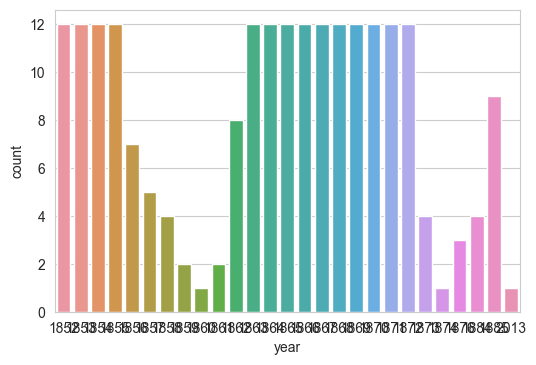

In [122]:
#Let us look at the histogram of the years with missing data.
sns.countplot(x="year", data=missing_data)

In [123]:
#We will now remove the rows with missing data from our dataset.
print("Number of rows before removing missing data:",len(city_data))
city_data = city_data.dropna()
print("Number of rows after removing missing data:",len(city_data))

Number of rows before removing missing data: 1977
Number of rows after removing missing data: 1758


<AxesSubplot:xlabel='month', ylabel='temperature'>

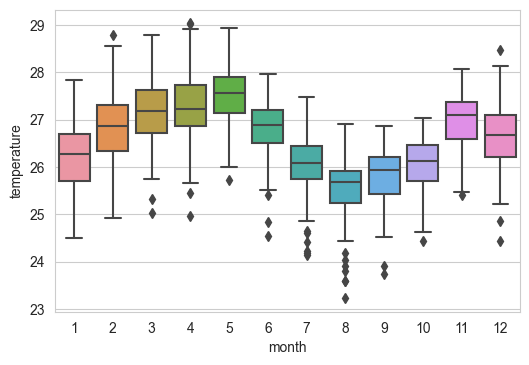

In [124]:
#Let us plot the boxplots of monthly average temperature.
sns.boxplot(x="month", y="temperature", data=city_data)

<AxesSubplot:xlabel='year', ylabel='temperature'>

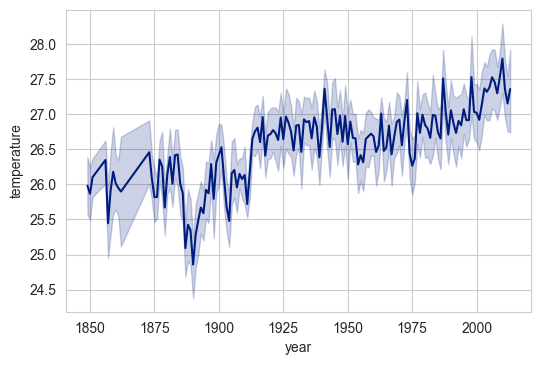

In [125]:
# Let us plot the mean temperature for each year in our dataset.
sns.lineplot(data=city_data, x="year", y="temperature")

<AxesSubplot:xlabel='year', ylabel='temperature'>

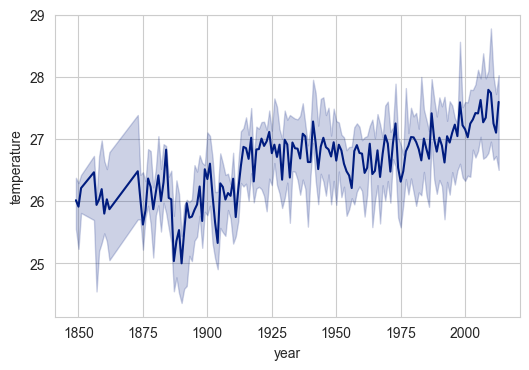

In [126]:
#Will now plot the median temperature for each year in the dataset.
sns.lineplot(data=city_data, x="year", y="temperature", estimator=np.median)

<AxesSubplot:xlabel='year', ylabel='temperature'>

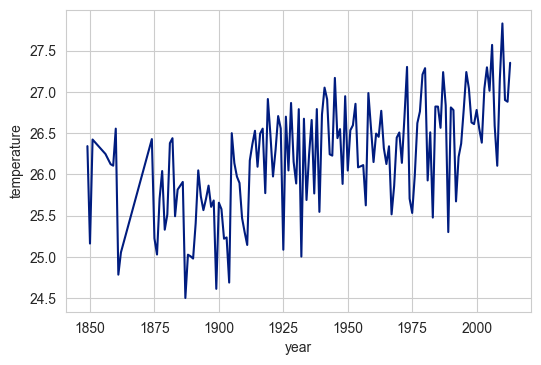

In [127]:
#Let us plot the mean temperature for all years in the dataset for the month of January.
sns.lineplot(data=city_data[city_data["month"]==1], x="year", y="temperature")

<AxesSubplot:xlabel='year', ylabel='temperature'>

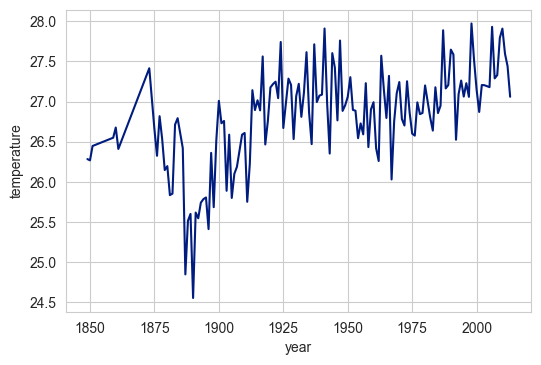

In [128]:
#Let us plot the mean temperature for all years in the dataset for the month of June.
sns.lineplot(data=city_data[city_data["month"]==6], x="year", y="temperature")

<AxesSubplot:xlabel='month', ylabel='deviation'>

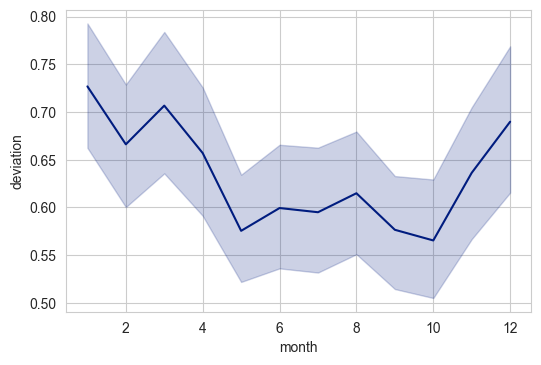

In [129]:
#We will plot the lineplot of mean deviation for each month in our dataset
sns.lineplot(x="month", y="deviation", data=city_data)

<AxesSubplot:xlabel='year', ylabel='deviation'>

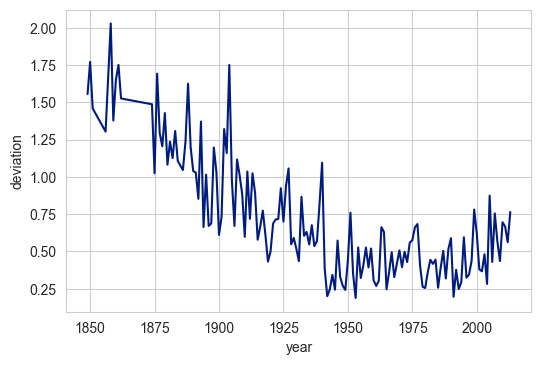

In [130]:
#Let us now plot the deviation for each year in the dataset for the month of January.
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==1])

<AxesSubplot:xlabel='year', ylabel='deviation'>

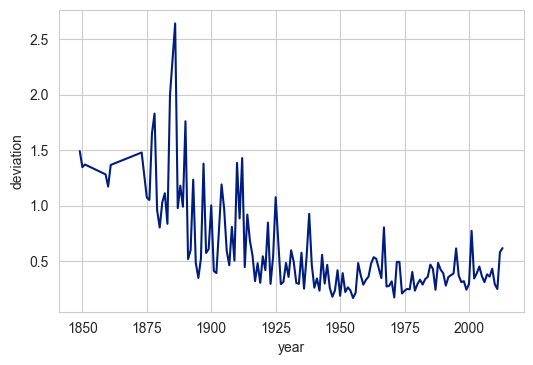

In [131]:
#We will now plot the deviation for each year in the dataset for the month of June.
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==6])

<AxesSubplot:xlabel='temperature', ylabel='deviation'>

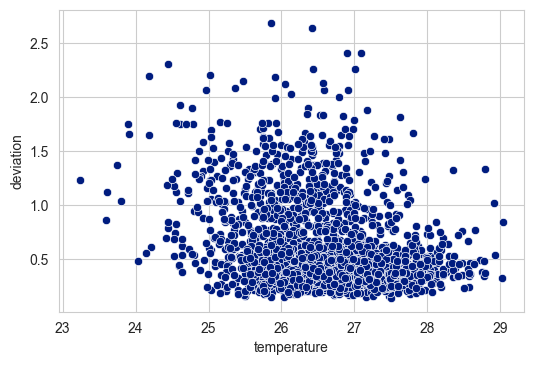

In [132]:
#Let us plot a scatterplot to see if there exists any correlation between temperature and deviation.
sns.scatterplot(data=city_data, x="temperature", y="deviation")

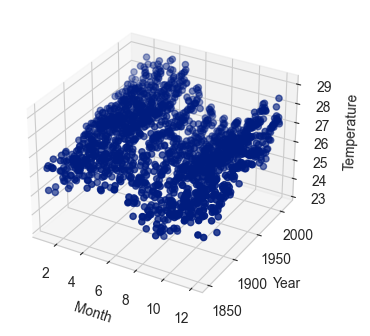

In [133]:
#We will now plot a 3D scatterplot to see if we can find any temperature, month and year.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(city_data['month'], city_data['year'], city_data['temperature'], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Temperature')
plt.show()